### Imports dataset

In [26]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 800000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [27]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,-0.097955,0.110437,-0.197755,-0.365489,-0.183125,0.072011,0.394745,-0.187415,-0.005184,0.068699,...,0.638057,0.560346,-0.403597,-0.438669,0.280389,-0.384023,-0.252884,0.665537,0.0,0
1,0.139900,0.280292,0.060091,-0.502098,-0.090779,0.060660,0.401685,-0.209162,0.039174,-0.039487,...,0.364690,0.411216,-0.090754,0.112772,0.296001,-0.486956,0.233320,-0.037620,0.0,0
2,0.521463,-0.041199,0.008703,-0.227416,-0.165364,0.096140,-0.169441,-0.214481,-0.095040,-0.124606,...,0.063197,0.373011,0.025491,-0.133943,0.209198,0.539094,-0.036143,0.262659,0.0,0
3,-0.677610,0.048941,0.005603,0.218678,-0.381051,0.007449,0.377712,0.301920,0.010888,0.081220,...,0.546800,-0.002166,-0.091186,-0.147357,0.065991,-0.205116,-0.036857,0.716507,0.0,0
4,-0.569735,0.094976,-0.058211,0.433987,0.170092,0.039468,0.252360,-0.137184,-0.130383,-0.116613,...,0.432584,-0.014595,-0.028431,0.661862,-0.396639,0.247964,0.181050,0.248446,0.0,0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [28]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,...,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000,13643.000000
mean,0.003028,0.000072,-0.000324,0.006268,0.000045,-0.001180,-0.001241,0.003855,0.000393,-0.008054,...,-0.003410,-0.004452,-0.005362,0.000508,0.000542,-0.008047,-0.001283,0.002590,0.776278,0.473723
std,0.366838,0.211897,0.084092,0.367323,0.212476,0.082688,0.367167,0.213173,0.083266,0.367261,...,0.320192,0.323376,0.309899,0.318080,0.322909,0.309241,0.321138,0.321848,1.545528,0.499327
min,-0.886022,-0.639626,-0.376514,-0.874945,-0.639626,-0.376514,-0.913721,-0.667278,-0.361812,-0.913721,...,-1.183017,-1.059510,-0.923400,-1.183017,-1.003379,-0.893333,-1.183017,-1.059510,0.000000,0.000000
25%,-0.307769,-0.156260,-0.040644,-0.304351,-0.158633,-0.041442,-0.316690,-0.154326,-0.039673,-0.319989,...,-0.234286,-0.220047,-0.228775,-0.227990,-0.210511,-0.230214,-0.232110,-0.214828,0.000000,0.000000
50%,0.007135,-0.000913,0.000211,0.005905,-0.001722,-0.000083,-0.000297,0.006180,0.000394,-0.009254,...,-0.000652,-0.003330,-0.002389,0.001785,-0.003403,-0.010544,0.001931,0.001005,0.000000,0.000000
75%,0.314550,0.160866,0.040784,0.317470,0.159829,0.040259,0.308521,0.160857,0.041022,0.305890,...,0.215787,0.215431,0.220682,0.222222,0.217822,0.219155,0.219557,0.218722,0.915212,1.000000
max,0.901104,0.595112,0.407086,0.901104,0.617138,0.407086,0.901104,0.631440,0.407086,0.877333,...,1.082534,1.115125,1.072556,1.082534,0.983223,0.948420,0.965539,1.115125,9.951922,1.000000


#### Class Balance

In [29]:
total_entries = len(tetrahedron_dataset)

# Basic intersection status counts
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

# Volume-based breakdown
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

# Calculate percentages
percentage_no_intersection = (status_0_count / total_entries) * 100
percentage_has_intersection = (status_1_count / total_entries) * 100
percentage_volume_gt_zero = (len(intersecting_with_volume) / total_entries) * 100
percentage_volume_eq_zero = (len(intersecting_zero_volume) / total_entries) * 100

print("=== Class Balance Analysis ===")
print(f"Total samples: {total_entries:,}")
print()
print("Basic Classification:")
print(f"  No intersection (HasIntersection = 0): {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Has intersection (HasIntersection = 1): {status_1_count:,} ({percentage_has_intersection:.2f}%)")
print()
print("Volume-based Classification:")
print(f"  No intersection: {status_0_count:,} ({percentage_no_intersection:.2f}%)")
print(f"  Touching only (volume = 0): {len(intersecting_zero_volume):,} ({percentage_volume_eq_zero:.2f}%)")
print(f"  Actual overlap (volume > 0): {len(intersecting_with_volume):,} ({percentage_volume_gt_zero:.2f}%)")
print()
print("Key Insights:")
print(f"  • {percentage_volume_gt_zero:.2f}% of all samples have meaningful volumetric intersection")
print(f"  • {percentage_volume_eq_zero:.2f}% of all samples are just touching (no volume overlap)")
print(f"  • Of intersecting cases, {len(intersecting_with_volume)/status_1_count*100:.1f}% have actual volume")
print(f"  • Of intersecting cases, {len(intersecting_zero_volume)/status_1_count*100:.1f}% are touching only")

# Verification
total_check = status_0_count + len(intersecting_with_volume) + len(intersecting_zero_volume)
print(f"\nVerification: {total_check:,} = {total_entries:,} ✓" if total_check == total_entries else f"\nError: {total_check:,} ≠ {total_entries:,}")

=== Class Balance Analysis ===
Total samples: 13,643

Basic Classification:
  No intersection (HasIntersection = 0): 7,180 (52.63%)
  Has intersection (HasIntersection = 1): 6,463 (47.37%)

Volume-based Classification:
  No intersection: 7,180 (52.63%)
  Touching only (volume = 0): 1,792 (13.13%)
  Actual overlap (volume > 0): 4,671 (34.24%)

Key Insights:
  • 34.24% of all samples have meaningful volumetric intersection
  • 13.13% of all samples are just touching (no volume overlap)
  • Of intersecting cases, 72.3% have actual volume
  • Of intersecting cases, 27.7% are touching only

Verification: 13,643 = 13,643 ✓


#### Coordinates precision

In [30]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')
max_precision_value = None
min_precision_value = None
max_precision_column = None
min_precision_column = None

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    col_max_precision = col_precision.max()
    col_min_precision = col_precision.min()
    
    # Update global max
    if col_max_precision > max_precision:
        max_precision = col_max_precision
        max_precision_idx = col_precision.idxmax()
        max_precision_value = tetrahedron_dataset.loc[max_precision_idx, col]
        max_precision_column = col
    
    # Update global min
    if col_min_precision < min_precision:
        min_precision = col_min_precision
        min_precision_idx = col_precision.idxmin()
        min_precision_value = tetrahedron_dataset.loc[min_precision_idx, col]
        min_precision_column = col
print("=== Coordinate Precision Analysis ===")
print(f"Min coordinate precision: {min_precision} decimal places")
print(f"  Example: {min_precision_value} (from {min_precision_column})")
print(f"Max coordinate precision: {max_precision} decimal places")
print(f"  Example: {max_precision_value} (from {max_precision_column})")

=== Coordinate Precision Analysis ===
Min coordinate precision: 2 decimal places
  Example: 0.28 (from T2_v3_y)
Max coordinate precision: 12 decimal places
  Example: -1.32564455e-05 (from T1_v1_x)


#### Coordinates distribution

=== Coordinate Analysis ===
Total coordinate values: 327,432
Expected range: [0, 1]
Actual range: [-1.183017, 1.115125]
Mean: -0.0011 (should be ~0.5 for uniform)
Std: 0.2856


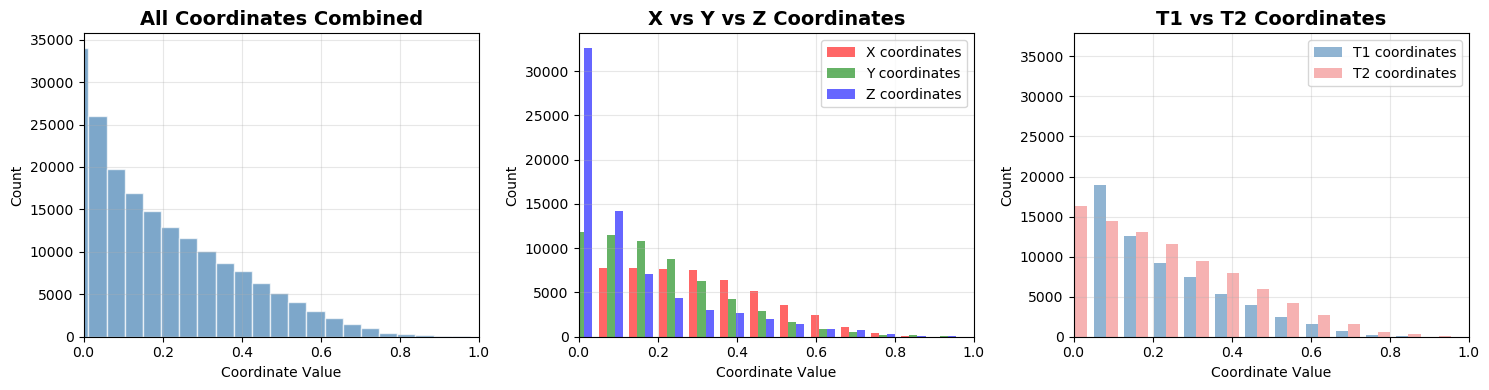


=== Uniformity Check ===
For uniform distribution [0,1]:
  Expected mean: 0.500
  Actual mean:   -0.001091
  Expected std:  ~0.289
  Actual std:    0.285570
⚠ Coordinates may not be uniformly distributed (mean differs by 0.501091)


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

print("=== Coordinate Analysis ===")

# Get all coordinates together
all_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns])

print(f"Total coordinate values: {len(all_coords):,}")
print(f"Expected range: [0, 1]")
print(f"Actual range: [{all_coords.min():.6f}, {all_coords.max():.6f}]")
print(f"Mean: {all_coords.mean():.4f} (should be ~0.5 for uniform)")
print(f"Std: {all_coords.std():.4f}")

# Simple overview plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Simple histogram of ALL coordinates
axes[0].hist(all_coords, bins=50, color='steelblue', alpha=0.7, edgecolor='white')
axes[0].set_title('All Coordinates Combined', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Coordinate Value')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, 1)
axes[0].grid(True, alpha=0.3)

# Plot 2: Compare X, Y, Z coordinates
x_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_x')])
y_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_y')])
z_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.endswith('_z')])

axes[1].hist([x_coords, y_coords, z_coords], bins=30, alpha=0.6, 
            label=['X coordinates', 'Y coordinates', 'Z coordinates'],
            color=['red', 'green', 'blue'])
axes[1].set_title('X vs Y vs Z Coordinates', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Coordinate Value')
axes[1].set_ylabel('Count')
axes[1].set_xlim(0, 1)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: T1 vs T2 comparison (if T2 exists)
if has_t2_columns(tetrahedron_dataset):
    t1_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T1')])
    t2_coords = np.concatenate([tetrahedron_dataset[col].values for col in coordinate_columns if col.startswith('T2')])
    
    axes[2].hist([t1_coords, t2_coords], bins=30, alpha=0.6,
                label=['T1 coordinates', 'T2 coordinates'],
                color=['steelblue', 'lightcoral'])
    axes[2].set_title('T1 vs T2 Coordinates', fontsize=14, fontweight='bold')
    axes[2].legend()
else:
    axes[2].hist(all_coords, bins=30, color='steelblue', alpha=0.7)
    axes[2].set_title('T1 Coordinates Only', fontsize=14, fontweight='bold')

axes[2].set_xlabel('Coordinate Value')
axes[2].set_ylabel('Count')
axes[2].set_xlim(0, 1)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quick statistical test for uniformity
print("\n=== Uniformity Check ===")
print("For uniform distribution [0,1]:")
print(f"  Expected mean: 0.500")
print(f"  Actual mean:   {all_coords.mean():.6f}")
print(f"  Expected std:  ~0.289")  # sqrt(1/12) for uniform [0,1]
print(f"  Actual std:    {all_coords.std():.6f}")

mean_diff = abs(all_coords.mean() - 0.5)
if mean_diff < 0.01:
    print(f"✓ Coordinates appear uniformly distributed (mean within 0.01 of 0.5)")
else:
    print(f"⚠ Coordinates may not be uniformly distributed (mean differs by {mean_diff:.6f})")

#### Tetrahedron volume distribution

Starting volume calculations...
Processing row 0 / 13,643
Volume calculations complete!
✅ Plot saved as: volume_analysis_plots/tetrahedron_volume_analysis_logscale_20250614_191113.png


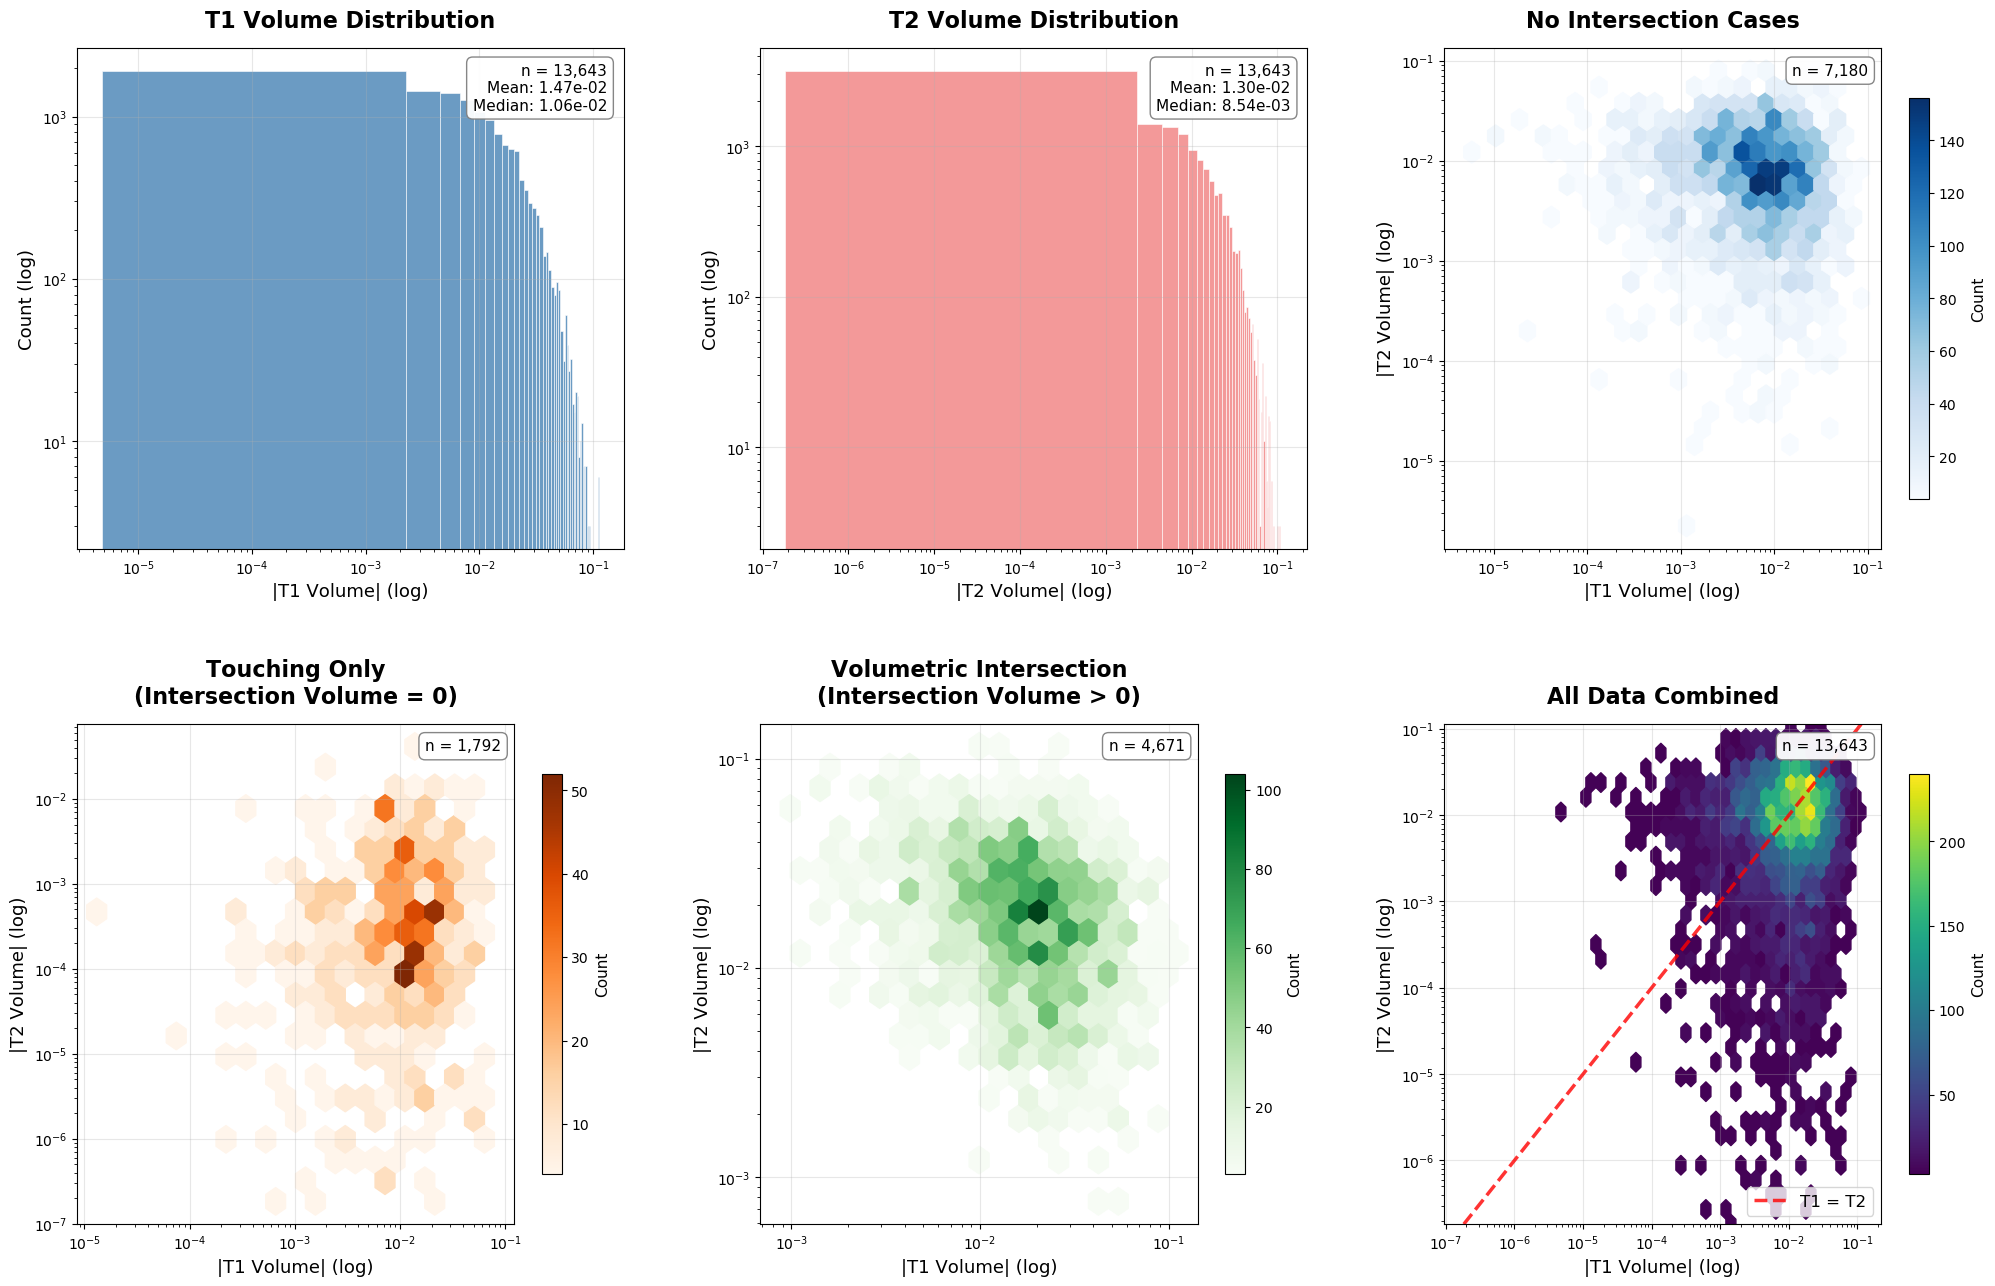


=== Enhanced Volume Statistics (Log Scale Analysis) ===
T1 volumes: n=13,643
T1 range: 4.76e-06 to 1.12e-01
T1 mean: 1.47e-02
T2 volumes: n=13,643
T2 range: 1.83e-07 to 1.15e-01
T2 mean: 1.30e-02

Log Scale Data Availability:
T1 volumes suitable for log scale: 13,643 (100.0%)
T2 volumes suitable for log scale: 13,643 (100.0%)

=== Volume Statistics by Intersection Status ===
No Intersection (7,180 samples):
  T1 - Mean: 1.04e-02, Std: 1.09e-02
  T2 - Mean: 1.05e-02, Std: 1.08e-02
Touching Only (1,792 samples):
  T1 - Mean: 1.42e-02, Std: 1.36e-02
  T2 - Mean: 1.27e-03, Std: 3.16e-03
Volumetric Intersection (4,671 samples):
  T1 - Mean: 2.16e-02, Std: 1.59e-02
  T2 - Mean: 2.14e-02, Std: 1.61e-02

✅ Analysis complete! All plots are in log scale and saved to 'volume_analysis_plots' directory.


In [37]:
### Tetrahedron Volume Analysis - 6 Key Plots in Log Scale ###
import src.GeometryUtils as gu
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def extract_t1_vertices(row):
    """Extract T1 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ], dtype=torch.float64)

def extract_t2_vertices(row):
    """Extract T2 tetrahedron vertices from a DataFrame row"""
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ], dtype=torch.float64)

# === Volume Calculation ===
print("Starting volume calculations...")
t1_volumes = []
t2_volumes = []
intersection_status = []

# Process all rows with progress tracking
total_rows = len(tetrahedron_dataset)
for i, (_, row) in enumerate(tetrahedron_dataset.iterrows()):
    if i % 500000 == 0:  # Progress every 500k rows
        print(f"Processing row {i:,} / {total_rows:,}")
    
    try:
        # Calculate T1 volume
        t1_vertices = extract_t1_vertices(row)
        volume_t1 = gu.calculate_tetrahedron_volume(t1_vertices)
        t1_volumes.append(volume_t1.item())
        
        # Calculate T2 volume if T2 columns exist
        if has_t2_columns(tetrahedron_dataset):
            t2_vertices = extract_t2_vertices(row)
            volume_t2 = gu.calculate_tetrahedron_volume(t2_vertices)
            t2_volumes.append(volume_t2.item())
        
        # Store intersection status
        intersection_status.append(row['HasIntersection'])
        
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        continue

print("Volume calculations complete!")

# Convert to numpy arrays for analysis
volumes_t1 = np.array(t1_volumes)
volumes_t2 = np.array(t2_volumes) if t2_volumes else None
intersection_status = np.array(intersection_status)

# Create masks for different intersection categories
no_intersection_mask = intersection_status == 0
has_intersection_mask = intersection_status == 1

# For the bonus: separate cases with volume = 0 from volume > 0
if 'IntersectionVolume' in tetrahedron_dataset.columns:
    intersection_volumes = tetrahedron_dataset['IntersectionVolume'].values[:len(intersection_status)]
    touching_only_mask = (intersection_status == 1) & (intersection_volumes == 0)
    volumetric_intersection_mask = (intersection_status == 1) & (intersection_volumes > 0)
else:
    touching_only_mask = None
    volumetric_intersection_mask = has_intersection_mask

# === Create export directory ===
output_dir = "volume_analysis_plots"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === 6 Key Plots in Log Scale ===
if has_t2_columns(tetrahedron_dataset) and volumes_t2 is not None:
    fig, axes = plt.subplots(2, 3, figsize=(22, 14))
    
    # Prepare data for log scale (handle negative volumes)
    abs_volumes_t1 = np.abs(volumes_t1)
    abs_volumes_t2 = np.abs(volumes_t2)
    
    # Filter out zero and very small values for log scale
    log_threshold = 1e-12
    t1_log_mask = abs_volumes_t1 > log_threshold
    t2_log_mask = abs_volumes_t2 > log_threshold
    
    # Plot 1: T1 Volume Distribution (Log Scale)
    t1_clean = abs_volumes_t1[t1_log_mask]
    if len(t1_clean) > 0:
        axes[0,0].hist(t1_clean, bins=50, color='steelblue', alpha=0.8, edgecolor='white', linewidth=0.5)
        axes[0,0].set_xscale('log')
        axes[0,0].set_yscale('log')
        axes[0,0].set_title('T1 Volume Distribution', fontsize=16, fontweight='bold', pad=15)
        axes[0,0].set_xlabel('|T1 Volume| (log)', fontsize=13)
        axes[0,0].set_ylabel('Count (log)', fontsize=13)
        axes[0,0].grid(alpha=0.3)
        
        # Add statistics
        mean_t1 = t1_clean.mean()
        median_t1 = np.median(t1_clean)
        axes[0,0].text(0.97, 0.97, f'n = {len(t1_clean):,}\nMean: {mean_t1:.2e}\nMedian: {median_t1:.2e}', 
                       transform=axes[0,0].transAxes, fontsize=11, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
    
    # Plot 2: T2 Volume Distribution (Log Scale)
    t2_clean = abs_volumes_t2[t2_log_mask]
    if len(t2_clean) > 0:
        axes[0,1].hist(t2_clean, bins=50, color='lightcoral', alpha=0.8, edgecolor='white', linewidth=0.5)
        axes[0,1].set_xscale('log')
        axes[0,1].set_yscale('log')
        axes[0,1].set_title('T2 Volume Distribution', fontsize=16, fontweight='bold', pad=15)
        axes[0,1].set_xlabel('|T2 Volume| (log)', fontsize=13)
        axes[0,1].set_ylabel('Count (log)', fontsize=13)
        axes[0,1].grid(alpha=0.3)
        
        # Add statistics
        mean_t2 = t2_clean.mean()
        median_t2 = np.median(t2_clean)
        axes[0,1].text(0.97, 0.97, f'n = {len(t2_clean):,}\nMean: {mean_t2:.2e}\nMedian: {median_t2:.2e}', 
                       transform=axes[0,1].transAxes, fontsize=11, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
    
    # Plot 3: Joint Distribution - No Intersection (Log Scale)
    no_int_t1 = abs_volumes_t1[no_intersection_mask]
    no_int_t2 = abs_volumes_t2[no_intersection_mask]
    no_int_mask = (no_int_t1 > log_threshold) & (no_int_t2 > log_threshold)
    no_int_t1_clean = no_int_t1[no_int_mask]
    no_int_t2_clean = no_int_t2[no_int_mask]
    
    if len(no_int_t1_clean) > 0:
        hb_no_int = axes[0,2].hexbin(no_int_t1_clean, no_int_t2_clean, gridsize=25, 
                                     cmap='Blues', mincnt=1, xscale='log', yscale='log')
        axes[0,2].set_title('No Intersection Cases', fontsize=16, fontweight='bold', pad=15)
        axes[0,2].set_xlabel('|T1 Volume| (log)', fontsize=13)
        axes[0,2].set_ylabel('|T2 Volume| (log)', fontsize=13)
        axes[0,2].grid(alpha=0.3)
        
        # Add sample count
        axes[0,2].text(0.97, 0.97, f'n = {len(no_int_t1_clean):,}', 
                       transform=axes[0,2].transAxes, fontsize=11, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
        
        cbar1 = fig.colorbar(hb_no_int, ax=axes[0,2], shrink=0.8)
        cbar1.set_label('Count', fontsize=11)
    else:
        axes[0,2].text(0.5, 0.5, 'No data available\nfor log visualization', 
                      transform=axes[0,2].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[0,2].set_title('No Intersection Cases', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 4: Joint Distribution - Touching Only (Log Scale)
    if touching_only_mask is not None and np.sum(touching_only_mask) > 0:
        touching_t1 = abs_volumes_t1[touching_only_mask]
        touching_t2 = abs_volumes_t2[touching_only_mask]
        touching_mask = (touching_t1 > log_threshold) & (touching_t2 > log_threshold)
        touching_t1_clean = touching_t1[touching_mask]
        touching_t2_clean = touching_t2[touching_mask]
        
        if len(touching_t1_clean) > 0:
            hb_touching = axes[1,0].hexbin(touching_t1_clean, touching_t2_clean, gridsize=20, 
                                          cmap='Oranges', mincnt=1, xscale='log', yscale='log')
            axes[1,0].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
            axes[1,0].set_xlabel('|T1 Volume| (log)', fontsize=13)
            axes[1,0].set_ylabel('|T2 Volume| (log)', fontsize=13)
            axes[1,0].grid(alpha=0.3)
            
            # Add sample count
            axes[1,0].text(0.97, 0.97, f'n = {len(touching_t1_clean):,}', 
                           transform=axes[1,0].transAxes, fontsize=11, 
                           verticalalignment='top', horizontalalignment='right',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
            
            cbar2 = fig.colorbar(hb_touching, ax=axes[1,0], shrink=0.8)
            cbar2.set_label('Count', fontsize=11)
        else:
            axes[1,0].text(0.5, 0.5, 'No data available\nfor log visualization', 
                          transform=axes[1,0].transAxes, ha='center', va='center', fontsize=14,
                          bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
            axes[1,0].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
    else:
        axes[1,0].text(0.5, 0.5, 'No touching-only\ndata available', 
                      transform=axes[1,0].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[1,0].set_title('Touching Only\n(Intersection Volume = 0)', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 5: Joint Distribution - Intersection with Volume (Log Scale)
    if np.sum(volumetric_intersection_mask) > 0:
        volumetric_t1 = abs_volumes_t1[volumetric_intersection_mask]
        volumetric_t2 = abs_volumes_t2[volumetric_intersection_mask]
        volumetric_mask = (volumetric_t1 > log_threshold) & (volumetric_t2 > log_threshold)
        volumetric_t1_clean = volumetric_t1[volumetric_mask]
        volumetric_t2_clean = volumetric_t2[volumetric_mask]
        
        if len(volumetric_t1_clean) > 0:
            hb_volumetric = axes[1,1].hexbin(volumetric_t1_clean, volumetric_t2_clean, gridsize=20, 
                                            cmap='Greens', mincnt=1, xscale='log', yscale='log')
            axes[1,1].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
            axes[1,1].set_xlabel('|T1 Volume| (log)', fontsize=13)
            axes[1,1].set_ylabel('|T2 Volume| (log)', fontsize=13)
            axes[1,1].grid(alpha=0.3)
            
            # Add sample count
            axes[1,1].text(0.97, 0.97, f'n = {len(volumetric_t1_clean):,}', 
                           transform=axes[1,1].transAxes, fontsize=11, 
                           verticalalignment='top', horizontalalignment='right',
                           bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
            
            cbar3 = fig.colorbar(hb_volumetric, ax=axes[1,1], shrink=0.8)
            cbar3.set_label('Count', fontsize=11)
        else:
            axes[1,1].text(0.5, 0.5, 'No data available\nfor log visualization', 
                          transform=axes[1,1].transAxes, ha='center', va='center', fontsize=14,
                          bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
            axes[1,1].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
    else:
        axes[1,1].text(0.5, 0.5, 'No volumetric intersection\ndata available', 
                      transform=axes[1,1].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[1,1].set_title('Volumetric Intersection\n(Intersection Volume > 0)', fontsize=16, fontweight='bold', pad=15)
    
    # Plot 6: Joint Distribution - All Data (Log Scale)
    all_log_mask = (abs_volumes_t1 > log_threshold) & (abs_volumes_t2 > log_threshold)
    all_t1_clean = abs_volumes_t1[all_log_mask]
    all_t2_clean = abs_volumes_t2[all_log_mask]
    
    if len(all_t1_clean) > 0:
        hb_all = axes[1,2].hexbin(all_t1_clean, all_t2_clean, gridsize=30, 
                                  cmap='viridis', mincnt=1, xscale='log', yscale='log')
        axes[1,2].set_title('All Data Combined', fontsize=16, fontweight='bold', pad=15)
        axes[1,2].set_xlabel('|T1 Volume| (log)', fontsize=13)
        axes[1,2].set_ylabel('|T2 Volume| (log)', fontsize=13)
        axes[1,2].grid(alpha=0.3)
        
        # Add diagonal line for reference
        min_val = min(all_t1_clean.min(), all_t2_clean.min())
        max_val = max(all_t1_clean.max(), all_t2_clean.max())
        axes[1,2].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, linewidth=2.5, label='T1 = T2')
        axes[1,2].legend(fontsize=12, loc='lower right')
        
        # Add sample count
        axes[1,2].text(0.97, 0.97, f'n = {len(all_t1_clean):,}', 
                       transform=axes[1,2].transAxes, fontsize=11, 
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.95, edgecolor='gray'))
        
        cbar4 = fig.colorbar(hb_all, ax=axes[1,2], shrink=0.8)
        cbar4.set_label('Count', fontsize=11)
    else:
        axes[1,2].text(0.5, 0.5, 'Insufficient data\nfor log visualization', 
                      transform=axes[1,2].transAxes, ha='center', va='center', fontsize=14,
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
        axes[1,2].set_title('All Data Combined', fontsize=16, fontweight='bold', pad=15)
    
    # Improve overall layout
    plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08, hspace=0.35, wspace=0.25)
    
    # === Export the plot ===
    export_filename = f"{output_dir}/tetrahedron_volume_analysis_logscale_{timestamp}.png"
    plt.savefig(export_filename, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Plot saved as: {export_filename}")
    
    plt.show()

else:
    print("❌ T2 columns not found - cannot create joint distribution plots")

# === Enhanced Summary Statistics ===
print(f"\n=== Enhanced Volume Statistics (Log Scale Analysis) ===")
print(f"T1 volumes: n={len(volumes_t1):,}")
print(f"T1 range: {volumes_t1.min():.2e} to {volumes_t1.max():.2e}")
print(f"T1 mean: {volumes_t1.mean():.2e}")

if volumes_t2 is not None:
    print(f"T2 volumes: n={len(volumes_t2):,}")
    print(f"T2 range: {volumes_t2.min():.2e} to {volumes_t2.max():.2e}")
    print(f"T2 mean: {volumes_t2.mean():.2e}")
    
    # Log scale data statistics
    t1_log_valid = np.sum(abs_volumes_t1 > log_threshold)
    t2_log_valid = np.sum(abs_volumes_t2 > log_threshold)
    
    print(f"\nLog Scale Data Availability:")
    print(f"T1 volumes suitable for log scale: {t1_log_valid:,} ({t1_log_valid/len(volumes_t1)*100:.1f}%)")
    print(f"T2 volumes suitable for log scale: {t2_log_valid:,} ({t2_log_valid/len(volumes_t2)*100:.1f}%)")
    
    # Breakdown by intersection status
    print(f"\n=== Volume Statistics by Intersection Status ===")
    
    # No intersection cases
    if np.sum(no_intersection_mask) > 0:
        no_int_t1 = volumes_t1[no_intersection_mask]
        no_int_t2 = volumes_t2[no_intersection_mask]
        print(f"No Intersection ({np.sum(no_intersection_mask):,} samples):")
        print(f"  T1 - Mean: {no_int_t1.mean():.2e}, Std: {no_int_t1.std():.2e}")
        print(f"  T2 - Mean: {no_int_t2.mean():.2e}, Std: {no_int_t2.std():.2e}")
    
    # Touching only cases
    if touching_only_mask is not None and np.sum(touching_only_mask) > 0:
        touching_t1 = volumes_t1[touching_only_mask]
        touching_t2 = volumes_t2[touching_only_mask]
        print(f"Touching Only ({np.sum(touching_only_mask):,} samples):")
        print(f"  T1 - Mean: {touching_t1.mean():.2e}, Std: {touching_t1.std():.2e}")
        print(f"  T2 - Mean: {touching_t2.mean():.2e}, Std: {touching_t2.std():.2e}")
    
    # Volumetric intersection cases
    if np.sum(volumetric_intersection_mask) > 0:
        volumetric_t1 = volumes_t1[volumetric_intersection_mask]
        volumetric_t2 = volumes_t2[volumetric_intersection_mask]
        print(f"Volumetric Intersection ({np.sum(volumetric_intersection_mask):,} samples):")
        print(f"  T1 - Mean: {volumetric_t1.mean():.2e}, Std: {volumetric_t1.std():.2e}")
        print(f"  T2 - Mean: {volumetric_t2.mean():.2e}, Std: {volumetric_t2.std():.2e}")

print(f"\n✅ Analysis complete! All plots are in log scale and saved to '{output_dir}' directory.")

Distribution centered around zero: Yes


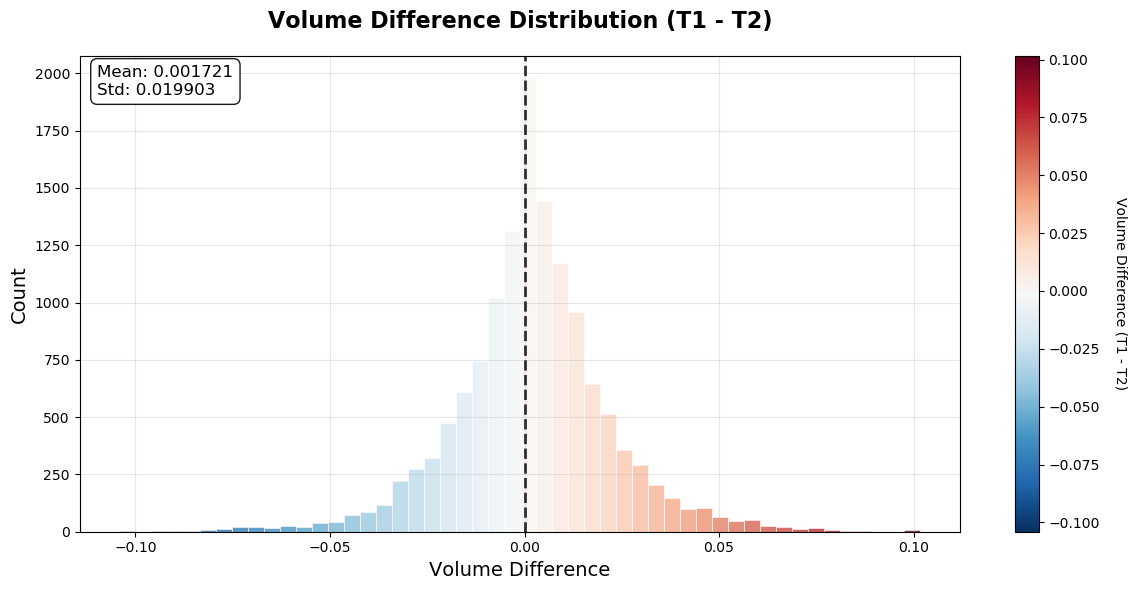

=== Volume Difference Analysis (T1 - T2) ===

Total samples: 13,643
Range: -0.10402203 to 0.10163749
Mean difference: 0.00172100
Median difference: 0.00153078
Standard deviation: 0.01990333
Positive differences (T1 > T2): 56.5%
Negative differences (T2 > T1): 43.5%
Zero differences: 0.0%


In [33]:
### === Volume Difference Analysis (T1 - T2) ===
if has_t2_columns(tetrahedron_dataset):
    # Calculate the difference in volumes
    volume_diff = np.array(t1_volumes) - np.array(t2_volumes)

    # Check if distribution is centered around zero (expected for random tetrahedra)
    zero_centered = abs(volume_diff.mean()) < volume_diff.std() * 0.1
    print(f"Distribution centered around zero: {'Yes' if zero_centered else 'No'}")
    
    # Simple, clean plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create histogram with color mapping based on bin centers
    counts, bins, patches = ax.hist(volume_diff, bins=50, alpha=0.8, edgecolor='white', linewidth=0.5)
    
    # Color the bars based on their position relative to zero
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Normalize colors based on distance from zero
    norm = plt.Normalize(vmin=volume_diff.min(), vmax=volume_diff.max())
    colors = plt.cm.RdBu_r(norm(bin_centers))  # Red-Blue colormap (reversed)
    
    # Apply colors to patches
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Volume Difference (T1 - T2)', rotation=270, labelpad=20)
    
    # Add zero reference line
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.8)
    
    # Clean formatting
    ax.set_title('Volume Difference Distribution (T1 - T2)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Volume Difference', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Add simple stats in corner
    stats_text = f'Mean: {volume_diff.mean():.6f}\nStd: {volume_diff.std():.6f}'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    plt.show()
    
    print(f"=== Volume Difference Analysis (T1 - T2) ===\n")
    print(f"Total samples: {len(volume_diff):,}")
    print(f"Range: {volume_diff.min():.8f} to {volume_diff.max():.8f}")
    print(f"Mean difference: {volume_diff.mean():.8f}")
    print(f"Median difference: {np.median(volume_diff):.8f}")
    print(f"Standard deviation: {volume_diff.std():.8f}")
    print(f"Positive differences (T1 > T2): {np.sum(volume_diff > 0) / len(volume_diff) * 100:.1f}%")
    print(f"Negative differences (T2 > T1): {np.sum(volume_diff < 0) / len(volume_diff) * 100:.1f}%")
    print(f"Zero differences: {np.sum(volume_diff == 0) / len(volume_diff) * 100:.1f}%")
    
else:
    print("No T2 columns found - cannot compute volume differences")

#### Intersection volume distribution

=== Intersection Volume Analysis ===
Total samples: 13,643
No intersection (HasIntersection=0): 7,180 (52.6%)
Has intersection (HasIntersection=1): 6,463 (47.4%)
  ├─ With volume > 0: 4,671 (34.2%)
  └─ With volume = 0 (touching): 1,792 (13.1%)

Intersection Volume Statistics (for volume > 0 cases):
(Note during training volumes are scaled up by a factor of 1000.0 for training stability, here showing original values)
  Mean: 2.27e-03
  Median: 1.57e-03
  Min: 5.0069565e-04
  Max: 9.9519220e-03
  Standard deviation: 1.90e-03

Key Insights:
  • 1,792 cases have geometric intersection but zero volume
    (likely touching at faces/edges/vertices)
  • 4,671 cases have actual volumetric overlap
  • Ratio of touching-only to volumetric: 0.384


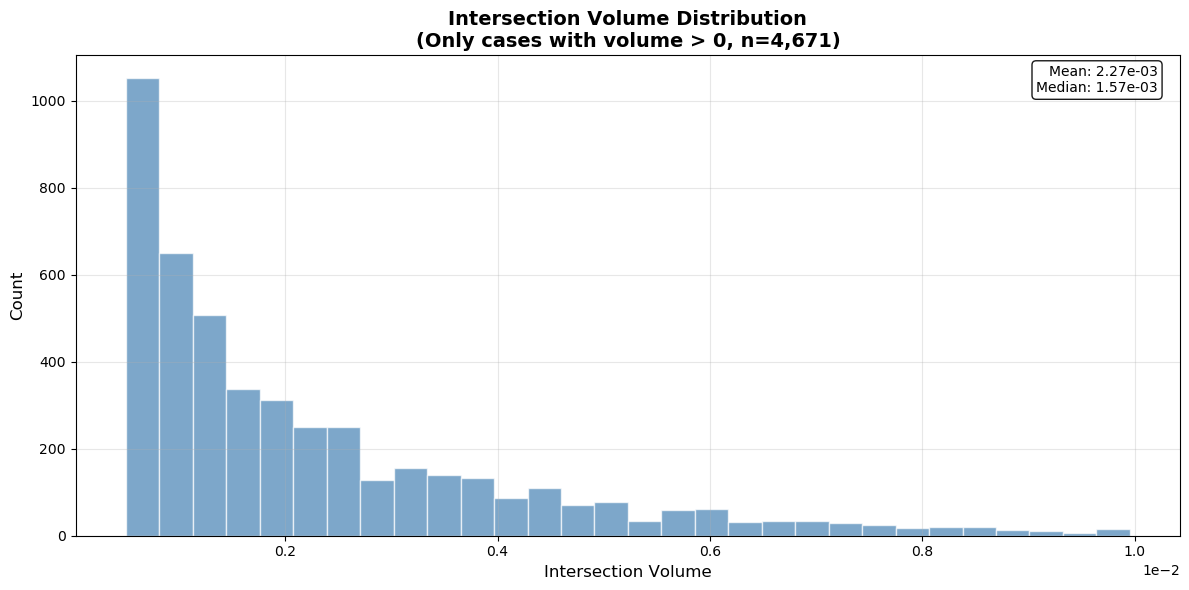

In [34]:
### === Intersection Volume Analysis ===
print("=== Intersection Volume Analysis ===")

total_samples = len(tetrahedron_dataset)
has_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1]
no_intersection = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0]

# Further break down intersection cases
intersecting_with_volume = has_intersection[has_intersection['IntersectionVolume'] > 0]
intersecting_zero_volume = has_intersection[has_intersection['IntersectionVolume'] == 0]

print(f"Total samples: {total_samples:,}")
print(f"No intersection (HasIntersection=0): {len(no_intersection):,} ({len(no_intersection)/total_samples*100:.1f}%)")
print(f"Has intersection (HasIntersection=1): {len(has_intersection):,} ({len(has_intersection)/total_samples*100:.1f}%)")
print(f"  ├─ With volume > 0: {len(intersecting_with_volume):,} ({len(intersecting_with_volume)/total_samples*100:.1f}%)")
print(f"  └─ With volume = 0 (touching): {len(intersecting_zero_volume):,} ({len(intersecting_zero_volume)/total_samples*100:.1f}%)")

if len(intersecting_with_volume) > 0:
    volume_scale_factor = 1e3  # Scale up for training stability
    # Single plot - just the intersection volume histogram for non-zero volumes
    fig, ax = plt.subplots(figsize=(12, 6))
    
    volumes = intersecting_with_volume['IntersectionVolume'].to_numpy() / volume_scale_factor
    
    ax.hist(volumes, bins=30, color='steelblue', alpha=0.7, edgecolor='white')
    ax.set_title(f'Intersection Volume Distribution\n(Only cases with volume > 0, n={len(volumes):,})', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Intersection Volume', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.grid(alpha=0.3)
    
    # Format x-axis in scientific notation for readability
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    # Add simple stats
    mean_vol = volumes.mean()
    median_vol = np.median(volumes)
    stats_text = f'Mean: {mean_vol:.2e}\nMedian: {median_vol:.2e}'
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Enhanced summary statistics
    print(f"\nIntersection Volume Statistics (for volume > 0 cases):")
    print(f"(Note during training volumes are scaled up by a factor of {volume_scale_factor} for training stability, here showing original values)")
    print(f"  Mean: {mean_vol:.2e}")
    print(f"  Median: {median_vol:.2e}")
    print(f"  Min: {volumes.min():.7e}")
    print(f"  Max: {volumes.max():.7e}")
    print(f"  Standard deviation: {volumes.std():.2e}")
    
    # Additional insights
    if len(intersecting_zero_volume) > 0:
        print(f"\nKey Insights:")
        print(f"  • {len(intersecting_zero_volume):,} cases have geometric intersection but zero volume")
        print(f"    (likely touching at faces/edges/vertices)")
        print(f"  • {len(intersecting_with_volume):,} cases have actual volumetric overlap")
        print(f"  • Ratio of touching-only to volumetric: {len(intersecting_zero_volume)/len(intersecting_with_volume):.3f}")

    plt.tight_layout()
    plt.show()
    
    
else:
    print("No cases with intersection volume > 0 found")
    if len(intersecting_zero_volume) > 0:
        print(f"However, {len(intersecting_zero_volume):,} cases have intersection but zero volume (touching only)")